# Check Password Strength Using ML algorithms

The data set is taken from UCI machine learning Repository. The data has two columns.
First column is the password. Second column has three value 0, 1, 2 (categorical variable).
0 means password is weak

1 indicates password has medium strength.

2 means the pass word is strong.

### Importing python Libraries 

In [ ]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Reading the data

In [ ]:

data = pd.read_csv('data.csv',',',error_bad_lines=False)


In [58]:
data.shape

(669640, 2)

In [59]:
data.head(25)

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
5,AVYq1lDE4MgAZfNt,2
6,u6c8vhow,1
7,v1118714,1
8,universe2908,1
9,as326159,1


### Checking for missing values

In [60]:
data.isnull().sum()

password    1
strength    0
dtype: int64

### Let us chech which particular value is missing. 

In [61]:
data[data['password'].isnull()]

,password,strength
367579,NaN,0


### Since there is only one missing value we can dro it. 

In [62]:
data.dropna(inplace=True)

In [63]:
data.isnull().sum()

password    0
strength    0
dtype: int64

### Change to array for ease of working on it.

In [64]:
password_tuples = np.array(data)

In [65]:
password_tuples

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

### Shuffling randomly for robustness

In [66]:

import random
random.shuffle(password_tuples)

### Dividing the data set as dependent and independent columns.

In [67]:

X = [lables[0] for lables in password_tuples]

In [68]:
y = [lables[1] for lables in password_tuples]

### Use countplot to plot  the categorical variables.

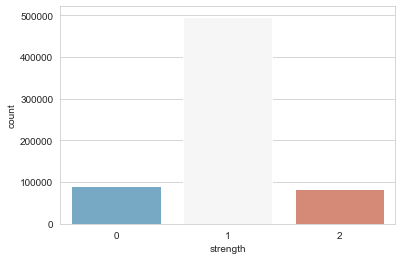

In [70]:
sns.set_style('whitegrid')
sns.countplot(x='strength',data=data,palette='RdBu_r')

### We us NLP to determine the strenth of the passwords.

In [72]:
X

['kzde5577',
 'kzde5577',
 'kzde5577',
 'visi7k1yr',
 'lamborghin1',
 'AVYq1lDE4MgAZfNt',
 'AVYq1lDE4MgAZfNt',
 'megzy123',
 'lamborghin1',
 'kzde5577',
 'universe2908',
 'megzy123',
 'as326159',
 'megzy123',
 'u6c8vhow',
 'v1118714',
 'as326159',
 '52558000aaa',
 'g067057895',
 'megzy123',
 '6975038lp',
 'WUt9IZzE0OQ7PkNE',
 'WUt9IZzE0OQ7PkNE',
 'elyass15@ajilent-ci',
 'visi7k1yr',
 'visi7k1yr',
 'asv5o9yu',
 'idofo673',
 'kino3434',
 '612035180tok',
 'universe2908',
 '0169395484a',
 'elyass15@ajilent-ci',
 'klara-tershina3H',
 'faranumar91',
 'u6c8vhow',
 'u6c8vhow',
 'faranumar91',
 'cigicigi123',
 'AVYq1lDE4MgAZfNt',
 'trabajonet9',
 'fahad123',
 'u6c8vhow',
 'alimagik1',
 'megzy123',
 'lamborghin1',
 'gaymaids1',
 'elyass15@ajilent-ci',
 'g067057895',
 '612035180tok',
 'visi7k1yr',
 'g067057895',
 'asv5o9yu',
 '612035180tok',
 'fahad123',
 '612035180tok',
 'yitbos77',
 'b4NbTxDEyNgG141J',
 'patri1973',
 'kswa2mrv',
 'patri1973',
 'universe2908',
 'olmaz.',
 'patri1973',
 'ejeko677

### Password is determined strength is determined by each every chanracters we use. 

In [73]:

def word_divide_char(inputs):
    characters=[]
    for i in inputs:
        characters.append(i)
    return characters

In [74]:
vectorizer=TfidfVectorizer(tokenizer=word_divide_char)
X=vectorizer.fit_transform(X)


In [75]:
X.shape

(669639, 127)

In [76]:
vectorizer.vocabulary_

{'k': 60,
 'z': 75,
 'd': 53,
 'e': 54,
 '5': 33,
 '7': 35,
 'v': 71,
 'i': 58,
 's': 68,
 '1': 29,
 'y': 74,
 'r': 67,
 'l': 61,
 'a': 50,
 'm': 62,
 'b': 51,
 'o': 64,
 'g': 56,
 'h': 57,
 'n': 63,
 'q': 66,
 '4': 32,
 'f': 55,
 't': 69,
 '2': 30,
 '3': 31,
 'u': 70,
 '9': 37,
 '0': 28,
 '8': 36,
 '6': 34,
 'c': 52,
 'w': 72,
 'p': 65,
 '@': 43,
 'j': 59,
 '-': 25,
 'x': 73,
 '.': 26,
 '&': 20,
 '?': 42,
 '>': 41,
 '<': 39,
 '!': 15,
 '_': 48,
 ';': 38,
 '±': 86,
 ' ': 14,
 '"': 16,
 '~': 79,
 '+': 24,
 '^': 47,
 '/': 27,
 '$': 18,
 ')': 22,
 '%': 19,
 '#': 17,
 '(': 21,
 '*': 23,
 '{': 76,
 '}': 78,
 '[': 44,
 ']': 46,
 'ú': 116,
 '\\': 45,
 'þ': 120,
 'ó': 111,
 '=': 40,
 '³': 88,
 '\x1c': 12,
 'ô': 112,
 '`': 49,
 '¿': 93,
 '\x05': 1,
 '\x1b': 11,
 '\x19': 10,
 'ß': 95,
 'å': 101,
 '‚': 124,
 'ä': 100,
 'à': 96,
 'õ': 113,
 'ð': 108,
 '\x16': 7,
 'ò': 110,
 '·': 90,
 '\x1e': 13,
 '|': 77,
 '°': 85,
 '²': 87,
 'â': 98,
 '\x7f': 80,
 'ý': 119,
 'û': 117,
 '«': 84,
 '¾': 92,
 '÷': 11

### We created a vector of length 127 entry.

In [78]:
X

<669639x127 sparse matrix of type '<class 'numpy.float64'>'
	with 5644090 stored elements in Compressed Sparse Row format>

### To see how our pass word is converted to vector. WE take example.

In [80]:
data.iloc[0,0]

'kzde5577'

In [81]:
feature_names = vectorizer.get_feature_names()
 
#get tfidf vector for first document
first_document_vector=X[0]
 
#print the scores
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

,tfidf
7,0.590633
5,0.567737
z,0.336143
k,0.292168
d,0.285630
...,...
;,0.000000
9,0.000000
8,0.000000
6,0.000000


## Prediction. 

#### Logistic Regression.

In [82]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#### Train Test split.

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)  #splitting

In [85]:
log_class=LogisticRegression(penalty='l2',multi_class='ovr')
log_class.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Check how the model performes

In [23]:
print(log_class.score(X_test,y_test))

0.8125037333492623


### Using multiclass classifier.

In [86]:
clf = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')
clf.fit(X_train, y_train) #training
print(clf.score(X_test, y_test))

0.8224419090854788


### Example 

In [87]:
X_predict=np.array(["%@123abcd"])
X_predict=vectorizer.transform(X_predict)
y_pred=log_class.predict(X_predict)
print(y_pred)

[2]


In [88]:
X_predict=np.array(["abcdef"])
X_predict=vectorizer.transform(X_predict)
y_pred=log_class.predict(X_predict)
print(y_pred)

[0]


In [89]:
X_predict=np.array(["l123abcd"])
X_predict=vectorizer.transform(X_predict)
y_pred=log_class.predict(X_predict)
print(y_pred)

[1]


## SVM Algoritm

In [93]:
from sklearn import svm

In [ ]:
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

## Xgboost Algorithm

In [90]:
import  xgboost as xgb

In [91]:
xgb_classifier = xgb.XGBClassifier()

In [92]:
xgb_classifier.fit(X_train, y_train) 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [31]:
xgb_classifier.score(X_test,y_test)

0.9865450092587061

In [ ]:
X_predict=np.array(["abcdef"])
X_predict=vectorizer.transform(X_predict)
y_pred=log_class.predict(X_predict)
print(y_pred)

In [ ]:
X_predict=np.array(["l123abcd"])
X_predict=vectorizer.transform(X_predict)
y_pred=log_class.predict(X_predict)
print(y_pred)

In [ ]:
X_predict=np.array(["%@123abcd"])
X_predict=vectorizer.transform(X_predict)
y_pred=log_class.predict(X_predict)
print(y_pred)

# MultinomialNB

In [36]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()

In [37]:
nb_classifier.fit(X_train, y_train) 

MultinomialNB()

In [38]:
nb_classifier.score(X_test,y_test)

0.7432874380264023

In [40]:
X_predict=np.array(["123abcd"])
X_predict=vectorizer.transform(X_predict)
y_pred=log_class.predict(X_predict)
print(y_pred)

[1]
